In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn

In [2]:
df = pd.read_csv ('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

C:\Users\cagat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


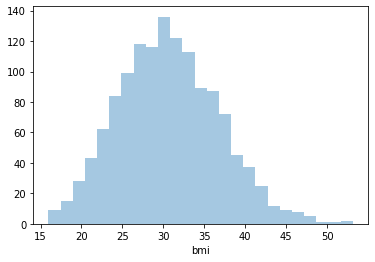

In [4]:
sns.distplot(df.bmi, kde = False);


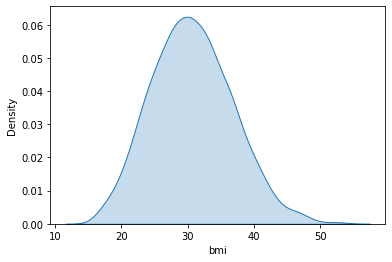

In [5]:
sns.kdeplot(df.bmi, shade = True);

## “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

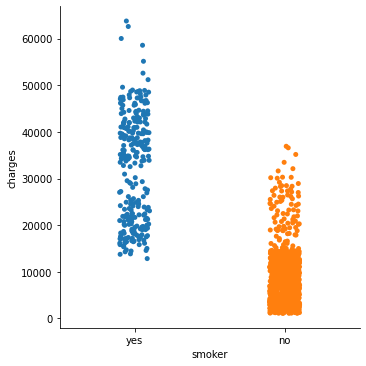

In [6]:
sns.catplot(x = df.smoker, y = df.charges, data = df);

## “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.


In [9]:
print("Smokers rate in northwest : ", df[df.region == "northwest"][df.smoker == "yes"].smoker.count() / df[df.region == "northwest"].smoker.count() * 100)
print("Smokers rate in northeast : ", df[df.region == "northeast"][df.smoker == "yes"].smoker.count() / df[df.region == "northeast"].smoker.count() * 100)
print("Smokers rate in southwest : ", df[df.region == "southwest"][df.smoker == "yes"].smoker.count() / df[df.region == "southwest"].smoker.count() * 100)
print("Smokers rate in southeast : ", df[df.region == "southeast"][df.smoker == "yes"].smoker.count() / df[df.region == "southeast"].smoker.count() * 100)

Smokers rate in northwest :  17.846153846153847
Smokers rate in northeast :  20.679012345679013
Smokers rate in southwest :  17.846153846153847
Smokers rate in southeast :  25.0


<ipython-input-9-9bea16e0300f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in northwest : ", df[df.region == "northwest"][df.smoker == "yes"].smoker.count() / df[df.region == "northwest"].smoker.count() * 100)
<ipython-input-9-9bea16e0300f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in northeast : ", df[df.region == "northeast"][df.smoker == "yes"].smoker.count() / df[df.region == "northeast"].smoker.count() * 100)
<ipython-input-9-9bea16e0300f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in southwest : ", df[df.region == "southwest"][df.smoker == "yes"].smoker.count() / df[df.region == "southwest"].smoker.count() * 100)
<ipython-input-9-9bea16e0300f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in southeast : ", df[df.region == "southeast"][df.smoker == "yes"].